# AdaBoosting Algorithm from scratch

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from math import log,exp
from sklearn import preprocessing

In [2]:
def normalize(base) -> pd.DataFrame:
    result = base.copy()
    new = preprocessing.LabelEncoder()
    for n in result:
        old = result[n]
        if old.dtype != 'int64' and old.dtype != 'float64':
            new.fit(old)
            result[n] = new.transform(old)
    return result

In [3]:
base = pd.read_csv("golf_df.csv")  
df = normalize(base)
df.head(3)

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1


In [4]:
#considering only two classes
example = df[(df['PlayGolf'] == 0) | (df['PlayGolf'] == 1)]
example['Label'] = example['PlayGolf'].replace(to_replace = [0,1], value=[-1,1])
example = example.drop('PlayGolf', axis = 1)
example['prob1'] = 1/(example.shape[0])

example

,Outlook,Temperature,Humidity,Wind,Label,prob1
0,2,1,0,1,-1,0.071429
1,2,1,0,0,-1,0.071429
2,0,1,0,1,1,0.071429
3,1,2,0,1,1,0.071429
4,1,0,1,1,1,0.071429
5,1,0,1,0,-1,0.071429
6,0,0,1,0,1,0.071429
7,2,2,0,1,-1,0.071429
8,2,0,1,1,1,0.071429
9,1,2,1,1,1,0.071429


Error: 0.2857142857142857


,Outlook,Temperature,Humidity,Wind,Label,prob1,pred1,misclassified,prob2
0,2,1,0,1,-1,0.071429,-1,0.0,0.050
1,2,1,0,0,-1,0.071429,-1,0.0,0.050
2,0,1,0,1,1,0.071429,-1,1.0,0.125
3,1,2,0,1,1,0.071429,-1,1.0,0.125
4,1,0,1,1,1,0.071429,1,0.0,0.050
5,1,0,1,0,-1,0.071429,1,1.0,0.125
6,0,0,1,0,1,0.071429,1,0.0,0.050
7,2,2,0,1,-1,0.071429,-1,0.0,0.050
8,2,0,1,1,1,0.071429,1,0.0,0.050
9,1,2,1,1,1,0.071429,1,0.0,0.050


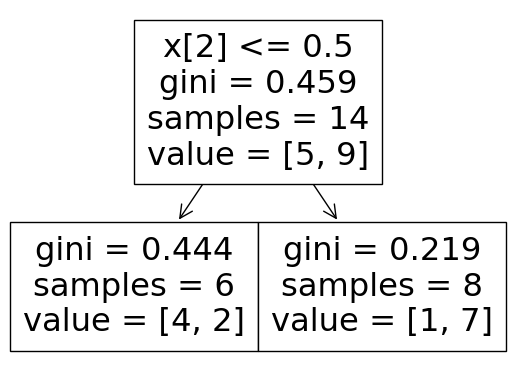

In [17]:
random.seed(10)
example1 = example.sample(len(example), replace = True, weights = example['prob1'])
example1 = example1.iloc[:,0:5]
X_train = example1.iloc[0:len(df),0:4]
y_train = example1.iloc[0:len(df),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(example.iloc[0:len(df),0:4])

example['pred1'] = y_pred
example['pred1'] = example['pred1'].replace(to_replace = [0,1], value=[-1,1])

tree.plot_tree(clf)

example.loc[example.Label != example.pred1, 'misclassified'] = 1
example.loc[example.Label == example.pred1, 'misclassified'] = 0

e1 = sum(example['misclassified'] * example['prob1'])
print("Error:" ,e1)

alpha1 = 0.5*log((1-e1)/e1)

new_weight = example['prob1']*np.exp(-1*alpha1*example['Label']*example['pred1'])


z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

example['prob2'] = round(normalized_weight,4)
example

Error: 0.5


,Outlook,Temperature,Humidity,Wind,Label,prob1,pred1,misclassified,prob2,pred2,misclassified2,prob3
0,2,1,0,1,-1,0.071429,-1,0.0,0.0556,-1,0.0,0.0556
1,2,1,0,0,-1,0.071429,-1,0.0,0.0556,-1,0.0,0.0556
2,0,1,0,1,1,0.071429,1,0.0,0.0556,1,0.0,0.0556
3,1,2,0,1,1,0.071429,-1,1.0,0.1000,-1,1.0,0.1000
4,1,0,1,1,1,0.071429,-1,1.0,0.1000,-1,1.0,0.1000
5,1,0,1,0,-1,0.071429,-1,0.0,0.0556,-1,0.0,0.0556
6,0,0,1,0,1,0.071429,1,0.0,0.0556,1,0.0,0.0556
7,2,2,0,1,-1,0.071429,-1,0.0,0.0556,-1,0.0,0.0556
8,2,0,1,1,1,0.071429,-1,1.0,0.1000,-1,1.0,0.1000
9,1,2,1,1,1,0.071429,-1,1.0,0.1000,-1,1.0,0.1000


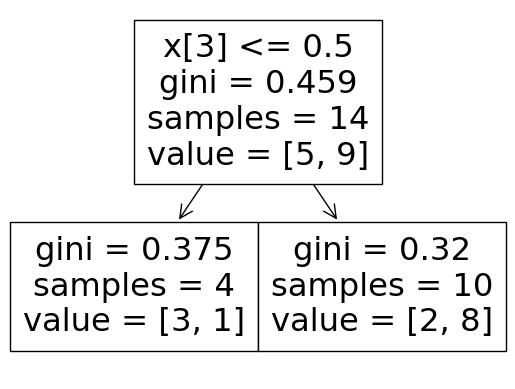

In [6]:
#Iteration 2
random.seed(20)
example2 = example.sample(len(example), replace = True, weights = example['prob2'])
example2 = example2.iloc[:,0:5]
X_train = example2.iloc[0:len(df),0:4]
y_train = example2.iloc[0:len(df),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(example.iloc[0:len(df),0:4])


example['pred2'] = y_pred
example['pred2'] = example['pred1'].replace(to_replace = [0,1], value=[-1,1])

#tree print
tree.plot_tree(clf)

#misclassification
example.loc[example.Label != example.pred2, 'misclassified2'] = 1
example.loc[example.Label == example.pred2, 'misclassified2'] = 0


#error calc
e2 = sum(example['misclassified2'] * example['prob2'])
print("Error:", e2)

alpha2 = 0.5*log((1-e2)/e2)

new_weight = example['prob2']*np.exp(-1*alpha2*example['Label']*example['pred2'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

#new weighted table
example['prob3'] = round(normalized_weight,4)
example

Error: 0.3224


,Outlook,Temperature,Humidity,Wind,Label,prob1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4
0,2,1,0,1,-1,0.071429,-1,0.0,0.0556,-1,0.0,0.0556,1,1.0,0.0862
1,2,1,0,0,-1,0.071429,-1,0.0,0.0556,-1,0.0,0.0556,-1,0.0,0.0410
2,0,1,0,1,1,0.071429,1,0.0,0.0556,1,0.0,0.0556,1,0.0,0.0410
3,1,2,0,1,1,0.071429,-1,1.0,0.1000,-1,1.0,0.1000,1,0.0,0.0738
4,1,0,1,1,1,0.071429,-1,1.0,0.1000,-1,1.0,0.1000,1,0.0,0.0738
5,1,0,1,0,-1,0.071429,-1,0.0,0.0556,-1,0.0,0.0556,-1,0.0,0.0410
6,0,0,1,0,1,0.071429,1,0.0,0.0556,1,0.0,0.0556,-1,1.0,0.0862
7,2,2,0,1,-1,0.071429,-1,0.0,0.0556,-1,0.0,0.0556,1,1.0,0.0862
8,2,0,1,1,1,0.071429,-1,1.0,0.1000,-1,1.0,0.1000,1,0.0,0.0738
9,1,2,1,1,1,0.071429,-1,1.0,0.1000,-1,1.0,0.1000,1,0.0,0.0738


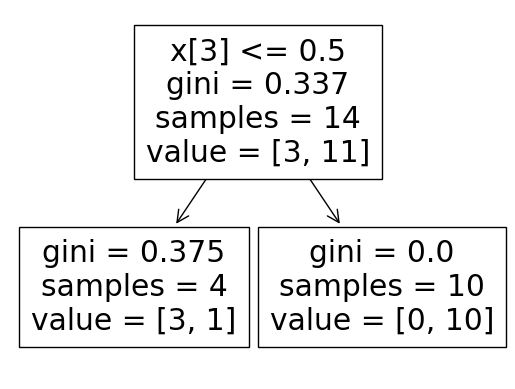

In [7]:
#Iteration 3
random.seed(30)
example3 = example.sample(len(example), replace = True, weights = example['prob3'])
example3 = example3.iloc[:,0:5]
X_train = example3.iloc[0:len(df),0:4]
y_train = example3.iloc[0:len(df),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)


y_pred = clf_gini.predict(example.iloc[0:len(df),0:4])
example['pred3'] = y_pred
example['pred3'] = example['pred3'].replace(to_replace = [0,1], value=[-1,1])

#tree print
tree.plot_tree(clf)

#misclassification
example.loc[example.Label != example.pred3, 'misclassified3'] = 1
example.loc[example.Label == example.pred3, 'misclassified3'] = 0

#error calc
e3 = sum(example['misclassified3'] * example['prob3'])
print("Error:", e3)

alpha3 = 0.5*log((1-e3)/e3)

new_weight = example['prob3']*np.exp(-1*alpha3*example['Label']*example['pred3'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

#new weighted data
example['prob4'] = round(normalized_weight,4)
example

Error: 0.24200000000000002


,Outlook,Temperature,Humidity,Wind,Label,prob1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4,pred4,misclassified4
0,2,1,0,1,-1,0.071429,-1,0.0,0.0556,-1,0.0,0.0556,1,1.0,0.0862,-1,0.0
1,2,1,0,0,-1,0.071429,-1,0.0,0.0556,-1,0.0,0.0556,-1,0.0,0.0410,-1,0.0
2,0,1,0,1,1,0.071429,1,0.0,0.0556,1,0.0,0.0556,1,0.0,0.0410,-1,1.0
3,1,2,0,1,1,0.071429,-1,1.0,0.1000,-1,1.0,0.1000,1,0.0,0.0738,-1,1.0
4,1,0,1,1,1,0.071429,-1,1.0,0.1000,-1,1.0,0.1000,1,0.0,0.0738,1,0.0
5,1,0,1,0,-1,0.071429,-1,0.0,0.0556,-1,0.0,0.0556,-1,0.0,0.0410,1,1.0
6,0,0,1,0,1,0.071429,1,0.0,0.0556,1,0.0,0.0556,-1,1.0,0.0862,1,0.0
7,2,2,0,1,-1,0.071429,-1,0.0,0.0556,-1,0.0,0.0556,1,1.0,0.0862,-1,0.0
8,2,0,1,1,1,0.071429,-1,1.0,0.1000,-1,1.0,0.1000,1,0.0,0.0738,1,0.0
9,1,2,1,1,1,0.071429,-1,1.0,0.1000,-1,1.0,0.1000,1,0.0,0.0738,1,0.0


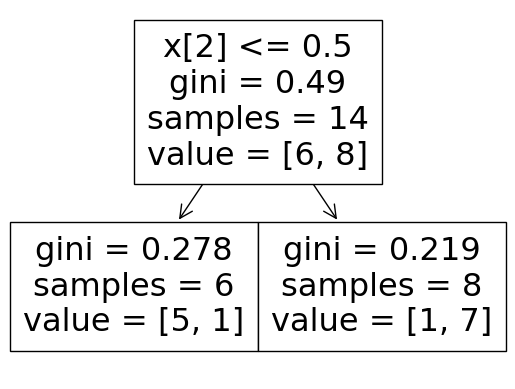

In [10]:
#Iteration 4
random.seed(40)
example4 = example.sample(len(example), replace = True, weights = example['prob4'])
example4 = example4.iloc[:,0:5]
X_train = example4.iloc[0:len(df),0:4]
y_train = example4.iloc[0:len(df),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(example.iloc[0:len(df),0:4])
example['pred4'] = y_pred
example['pred4'] = example['pred4'].replace(to_replace = [0,1], value=[-1,1])

#print tree
tree.plot_tree(clf)

#misclassification
example.loc[example.Label != example.pred4, 'misclassified4'] = 1
example.loc[example.Label == example.pred4, 'misclassified4'] = 0


#error calc
e4 = sum(example['misclassified4'] * example['prob4']) 
print("Error:", e4)

alpha4 = 0.5*log((1-e4)/e4)
example

In [11]:
print("Iteration 1:" , alpha1)
print("Iteration 2:" , alpha2)
print("Iteration 3:" , alpha3)
print("Iteration 4:" , alpha4)

Iteration 1: 0.2938933324510596
Iteration 2: 0.0
Iteration 3: 0.37138206635268567
Iteration 4: 0.5708728297428426


In [12]:
t = alpha1 * example['pred1'] + alpha2 * example['pred2'] + alpha3 * example['pred3'] + alpha4 * example['pred4']
np.sign(list(t))
example['final_pred'] = np.sign(list(t))

example

,Outlook,Temperature,Humidity,Wind,Label,prob1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4,pred4,misclassified4,final_pred
0,2,1,0,1,-1,0.071429,-1,0.0,0.0556,-1,0.0,0.0556,1,1.0,0.0862,-1,0.0,-1.0
1,2,1,0,0,-1,0.071429,-1,0.0,0.0556,-1,0.0,0.0556,-1,0.0,0.0410,-1,0.0,-1.0
2,0,1,0,1,1,0.071429,1,0.0,0.0556,1,0.0,0.0556,1,0.0,0.0410,-1,1.0,1.0
3,1,2,0,1,1,0.071429,-1,1.0,0.1000,-1,1.0,0.1000,1,0.0,0.0738,-1,1.0,-1.0
4,1,0,1,1,1,0.071429,-1,1.0,0.1000,-1,1.0,0.1000,1,0.0,0.0738,1,0.0,1.0
5,1,0,1,0,-1,0.071429,-1,0.0,0.0556,-1,0.0,0.0556,-1,0.0,0.0410,1,1.0,-1.0
6,0,0,1,0,1,0.071429,1,0.0,0.0556,1,0.0,0.0556,-1,1.0,0.0862,1,0.0,1.0
7,2,2,0,1,-1,0.071429,-1,0.0,0.0556,-1,0.0,0.0556,1,1.0,0.0862,-1,0.0,-1.0
8,2,0,1,1,1,0.071429,-1,1.0,0.1000,-1,1.0,0.1000,1,0.0,0.0738,1,0.0,1.0
9,1,2,1,1,1,0.071429,-1,1.0,0.1000,-1,1.0,0.1000,1,0.0,0.0738,1,0.0,1.0


In [13]:
c=confusion_matrix(example['Label'], example['final_pred'])
print("Accuracy Score: ", (c[0,0]+c[1,1])/np.sum(c)*100)

Accuracy Score:  78.57142857142857
